In [1]:
import getpass
import nibabel as nib
from matplotlib.pyplot import imsave
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [2]:
user = getpass.getuser()

nifti_dir = "/home/ORUNET/" + user + "/2303_Chalmers/Data/BWT/Nifti"
nifti_paths = list(Path(nifti_dir).glob('**/*.nii'))
seg_dir = "/home/ORUNET/" + user + "/2303_Chalmers/Data/BWT/Segmentations"
dst_dir = "/home/ORUNET/" + user + "/2303_Chalmers/Data/BWT/Preprocessed"

In [3]:
mask = nib.load(seg_dir + "/1001_bwt/mask_R.nii.gz").get_fdata()

In [4]:
start_z = 0

for z in range(mask.shape[2]):
    if mask[:,:,z].any():
        start_z = z
        break

stop_z = mask.shape[2]

for z in reversed(range(mask.shape[2])):
    if mask[:,:,z].any():
        stop_z = z
        break

print("start:", start_z, "stop:", stop_z)

start_x = 0

for x in range(mask.shape[0]):
    if mask[x,:,:].any():
        start_x = x
        break

stop_x = mask.shape[0]

for x in reversed(range(mask.shape[0])):
    if mask[x,:,:].any():
        stop_x = x
        break

print("start:", start_x, "stop:", stop_x)




start: 39 stop: 490
start: 36 stop: 271


In [5]:
nib_imgs = nib.load(nifti_paths[0]).get_fdata()
nib_imgs = nib_imgs[start_x:stop_x,50:-50, 200:201] 

low_cv, high_cv = -1024, 250

for i, im in enumerate(nib_imgs):
    if any(any(c > high_cv or c < low_cv for c in r) for r in im):
        nib_imgs[i] = [[max(min(c, high_cv), low_cv) for c in r] for r in im]

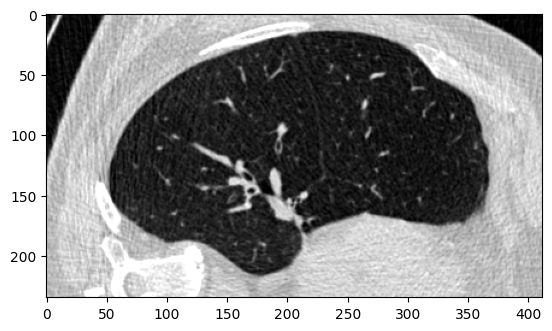

In [6]:
for i in range(0, nib_imgs.shape[2], 17):
    img = nib_imgs[:, :, i]
plt.imshow(img, cmap=cm.gray)
#imsave('name.png', img, cmap=cm.gray)